## 프로젝트 목표 
- 반도체 공정 데이터 분석을 통해 공정 이상을 예측하는 분류모델 수행
- 공정 이상에 영향을 미치는 요소들에 대한 데이터 분석 

#### 데이터 출처
- https://archive.ics.uci.edu/ml/datasets/SECOM


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('data/uci-secom.csv')
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
# 데이터 확인 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(1567, 592)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### 2. 데이터 전처리 
#### (1) 결측치 처리 

In [5]:
data.isnull().sum()
data.isnull().sum().sum()

41951

In [6]:
##### 모든 결측치는 0으로 대체
# DataFrame.fillna(값, inplace=True)
data = data.replace(np.NaN, 0)

In [7]:

data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

#### (2) 변수 제거 

In [8]:
##### Time 변수 제거

data = data.drop(columns=["Time"], axis=1)
data.shape

(1567, 591)

### 3. 시각화 

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

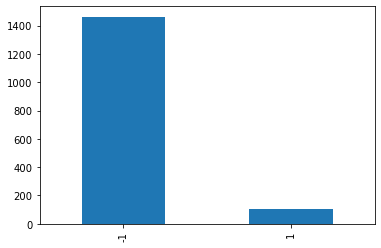

In [9]:
data["Pass/Fail"].value_counts().plot(kind="bar")
data["Pass/Fail"].value_counts()

In [10]:
data_test = data[['3', '4', '5', 'Pass/Fail']]
data_test

,3,4,5,Pass/Fail
0,1411.1265,1.3602,100.0,-1
1,1463.6606,0.8294,100.0,-1
2,1698.0172,1.5102,100.0,1
3,909.7926,1.3204,100.0,-1
4,1326.5200,1.5334,100.0,-1
...,...,...,...,...
1562,3085.3781,1.4843,100.0,-1
1563,1124.6595,0.8763,100.0,-1
1564,1110.4967,0.8236,100.0,-1
1565,1183.7287,1.5726,100.0,-1


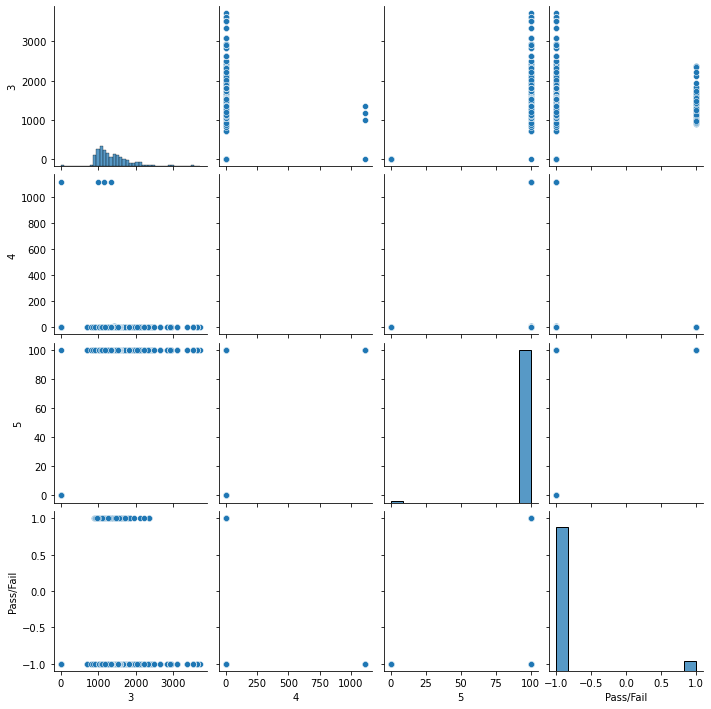

In [11]:
sns.pairplot(data_test)

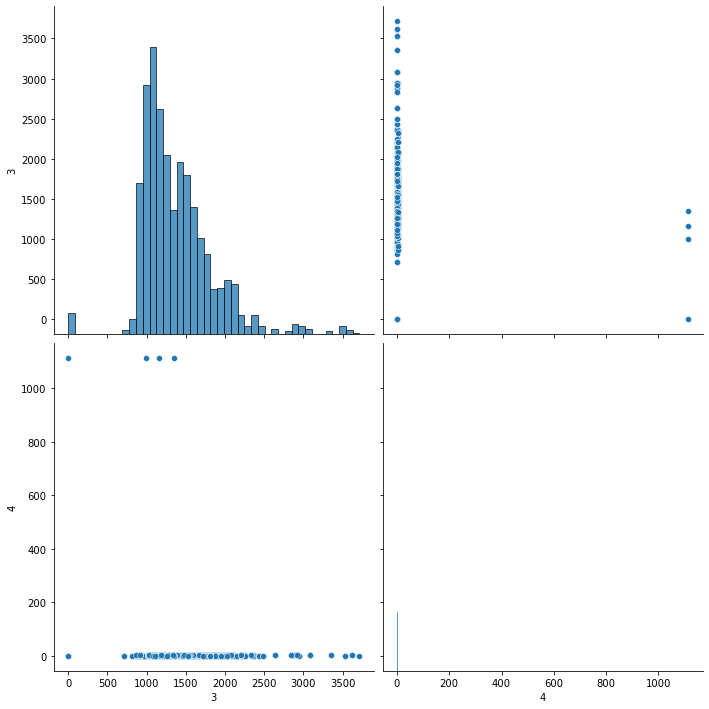

In [12]:
sns.pairplot(data_test, vars=['3', '4'], height=5)

#### (1) 59 번 센서 시각화 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '59 Sensor Measurements')

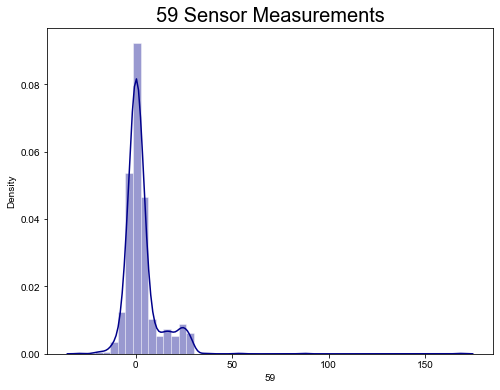

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.set(style="darkgrid")
sns.distplot(data["59"], color="darkblue")
plt.title("59 Sensor Measurements", fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, '59 Sensor Measurements')

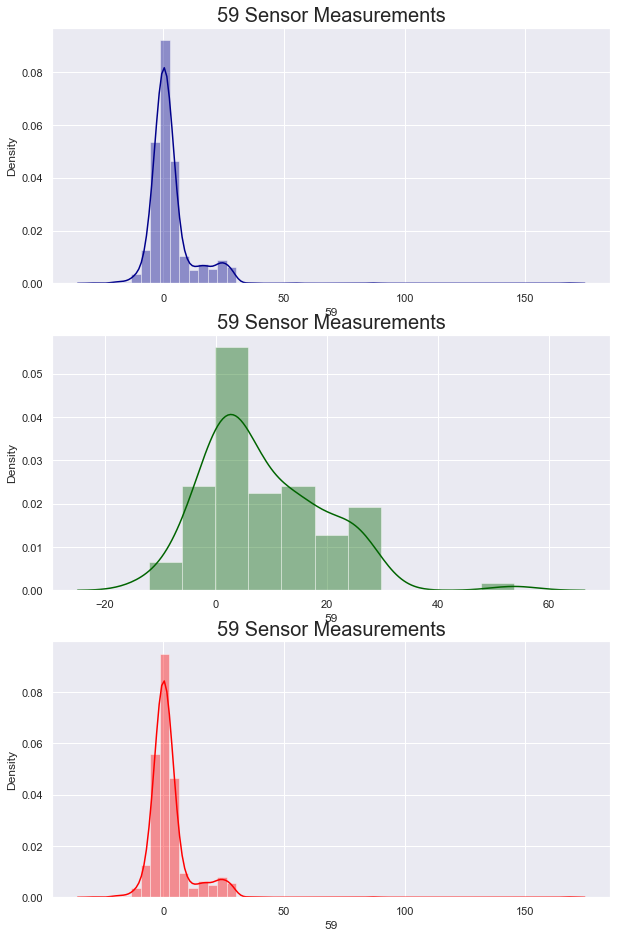

In [14]:
plt.rcParams["figure.figsize"] = (10, 16)

plt.subplot(3, 1, 1)
sns.distplot(data["59"], color="darkblue")
plt.title("59 Sensor Measurements", fontsize=20)

plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]["59"], color="darkgreen")
plt.title("59 Sensor Measurements", fontsize=20)


plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]["59"], color="red")
plt.title("59 Sensor Measurements", fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, '59 Sensor Measurements')

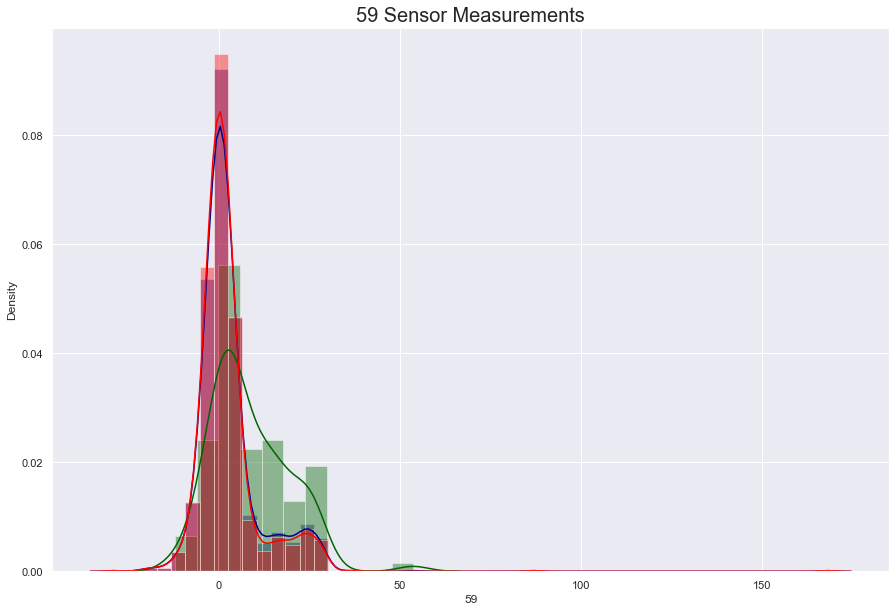

In [15]:
plt.rcParams["figure.figsize"] = (15, 10)

sns.distplot(data["59"], color="darkblue")
sns.distplot(data[data['Pass/Fail']==1]["59"], color="darkgreen")
sns.distplot(data[data['Pass/Fail']==-1]["59"], color="red")

plt.title("59 Sensor Measurements", fontsize=20)

### 4. 데이터 전처리 
- 데이터를 X, y로 분리
- Scaling

#### (1)  X와 y로 분리

In [16]:
X = data.drop(columns=["Pass/Fail"], axis=1)
y = data["Pass/Fail"]

X
y = y.to_numpy()
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [17]:
data_test = pd.read_csv("data/uci-secom-test.csv")
data_test

X_test = data_test.drop(columns=["Pass/Fail"], axis=1)
y_test = data_test["Pass/Fail"].to_numpy()


#### (2) 데이터 표준화 

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)
y_train = y

In [20]:
print(X_train.mean())
print(X_train.var())

1.921362031951641e-17
0.8101694915254235


### 5. 머신러닝 모델 학습
#### (1) 로지스틱 회귀

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9738353541799617
0.845


In [ ]:
?LogisticRegression

In [22]:
##### 변수 중요도 확인

abs_coef = np.abs(model.coef_).ravel()
abs_coef

array([1.96682789e-02, 1.55756063e-01, 2.29955033e-01, 2.39605031e-01,
       3.19462241e-02, 4.46658622e-01, 1.24395601e-01, 4.99525774e-01,
       1.51342744e-01, 3.26898803e-01, 1.82663397e-01, 3.35659345e-02,
       2.09853488e-01, 0.00000000e+00, 5.07612050e-01, 2.70213146e-01,
       5.76780438e-01, 2.80705786e-01, 3.48519454e-01, 1.46528822e-01,
       2.63969594e-01, 5.32753580e-01, 1.51831824e-02, 1.55647934e-01,
       2.19286277e-01, 9.30175127e-01, 5.00519254e-01, 5.95375699e-02,
       1.27481116e-01, 8.99996400e-01, 6.57573874e-01, 7.48744789e-02,
       2.56378901e-01, 4.32843887e-01, 3.15019351e-02, 4.05789020e-01,
       1.99508467e-01, 9.98011400e-02, 1.11919873e-01, 2.00450072e-01,
       4.39557643e-01, 1.75575443e-01, 1.91559225e-04, 1.88364550e-01,
       1.88397800e-02, 5.38515281e-01, 2.55548872e-01, 2.44571868e-01,
       3.85345374e-01, 1.91559225e-04, 2.45838587e-01, 2.00998759e-01,
       0.00000000e+00, 4.37555278e-01, 6.24844161e-01, 2.74686919e-01,
      

Text(0, 0.5, 'Weight absolute values')

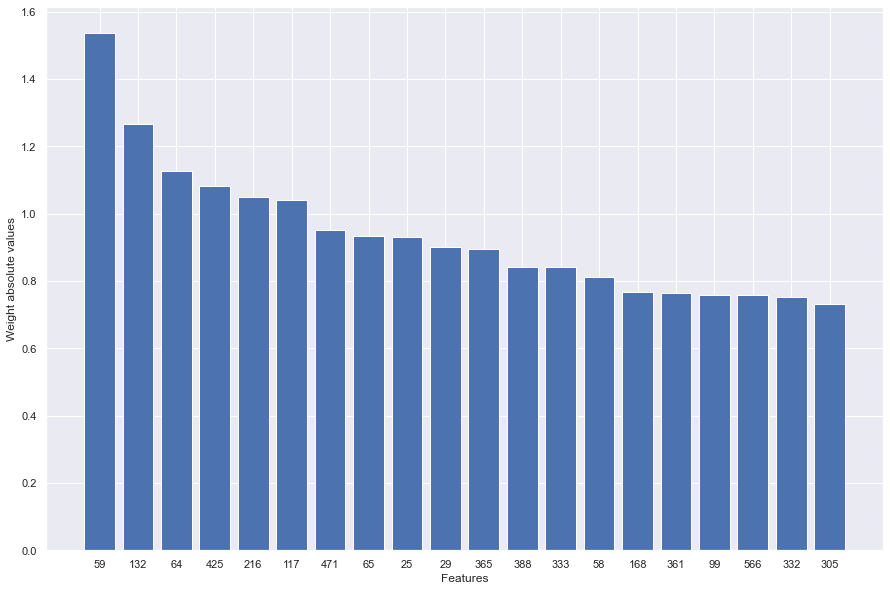

In [23]:
lr_import_x = [str(i[0]) for i in sorted(enumerate(abs_coef), key=lambda x:x[1], reverse=True)]
lr_import_x

plt.bar(lr_import_x[:20], sorted(abs_coef, reverse=True)[:20])
plt.rcParams["figure.figsize"] = (15, 10)
plt.xlabel("Features")
plt.ylabel("Weight absolute values")

In [24]:
# 만약 30번째 센서의 가중치값을 알고 싶을 때
print(sorted(abs_coef, reverse=True)[30])
print(lr_import_x[30])

0.6550627994933893
249


#### (2) 다양한 분류모델 학습 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb  # pip install xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("XGB", XGBClassifier()))

In [27]:
for name, model in models:
    model.fit(X_train, y_train)
    
    msg = "{} - train score : {}, test score : {}".format(name, model.score(X_train, y_train),
                                                         model.score(X_test, y_test))
    print(msg)

KNN - train score : 0.9342693044033185, test score : 0.5483333333333333
NB - train score : 0.18123803446075304, test score : 0.57
CART - train score : 1.0, test score : 0.65
RF - train score : 1.0, test score : 0.5033333333333333
LDA - train score : 0.9719208679004467, test score : 0.8833333333333333
SVM - train score : 0.9380982769623485, test score : 0.48833333333333334
[09:43:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB - train score : 1.0, test score : 0.6883333333333334


### 6. 평가 및 예측 
#### (1) Confusion Matrix

In [29]:

from sklearn.metrics import confusion_matrix

In [30]:
model_prediction_train = models[4][1].predict(X_train)
cm_train = confusion_matrix(y_train, model_prediction_train)
cm_train

array([[1448,   15],
       [  29,   75]], dtype=int64)

In [ ]:
### 오차표 확인 
plt.rcParams

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print('재현율 :',recall_score(y_test, models[4][1].predict(X_test)))
print('정밀도 :',precision_score(y_test, models[4][1].predict(X_test)))

재현율 : 0.7795527156549521
정밀도 : 0.9959183673469387


#### (2) 테스트 데이터의 예측값 출력 

In [38]:
for i in range(10):
    prediction=models[4][1].predict(X_test[i].reshape(1,-1))
    print('실제 데이터 : {},예측결과 :{}'.format(y_test[i],prediction[0]))
    

실제 데이터 : 1,예측결과 :1
실제 데이터 : -1,예측결과 :1
실제 데이터 : -1,예측결과 :-1
실제 데이터 : 1,예측결과 :-1
실제 데이터 : 1,예측결과 :1
실제 데이터 : -1,예측결과 :-1
실제 데이터 : -1,예측결과 :-1
실제 데이터 : 1,예측결과 :1
실제 데이터 : 1,예측결과 :1
실제 데이터 : 1,예측결과 :1
